# Logistic Regression - Survival of Titanic Passengers

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.shape

(891, 12)

In [8]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [10]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [12]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [16]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [17]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


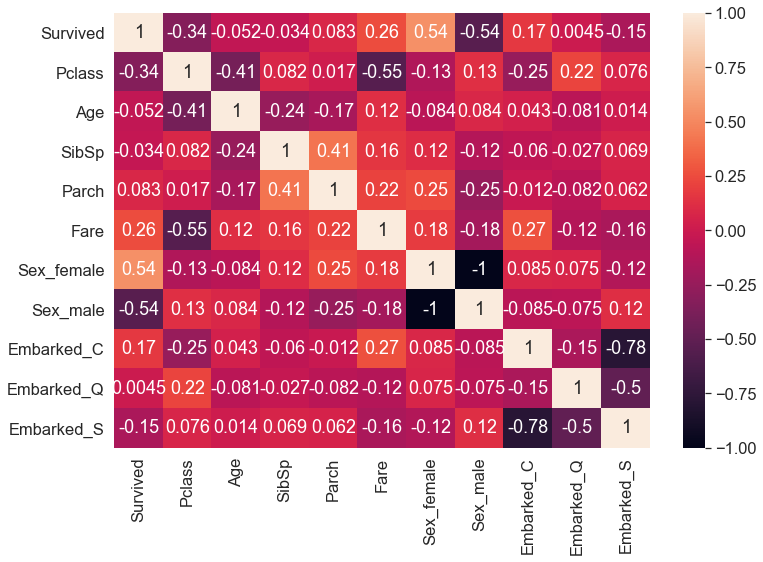

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train_dummied.corr(),annot=True)
plt.show()

In [19]:
used_features = ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

x=df_train_dummied[used_features].values
y=df_train_dummied['Survived']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [22]:
Lg = LogisticRegression()

In [23]:
Lg.fit(X_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = Lg.predict(X_test)

In [25]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [26]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [27]:
len(X_test)

267

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [29]:
Lg.coef_

array([[-1.04105026, -0.03984292, -0.24233951, -0.04222114,  1.19845057,
        -1.18999548,  0.35171955, -0.03580604, -0.30745842]])

In [30]:
Lg.intercept_

array([3.64521105])

In [31]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
Lg.predict_proba(X_test)

array([[0.26507463, 0.73492537],
       [0.39658005, 0.60341995],
       [0.94724273, 0.05275727],
       [0.25975967, 0.74024033],
       [0.94424057, 0.05575943],
       [0.13490002, 0.86509998],
       [0.33272635, 0.66727365],
       [0.51974474, 0.48025526],
       [0.7821272 , 0.2178728 ],
       [0.40681773, 0.59318227],
       [0.73977719, 0.26022281],
       [0.21201255, 0.78798745],
       [0.74834181, 0.25165819],
       [0.14581229, 0.85418771],
       [0.86435447, 0.13564553],
       [0.36900025, 0.63099975],
       [0.89369655, 0.10630345],
       [0.29725874, 0.70274126],
       [0.17612138, 0.82387862],
       [0.39940532, 0.60059468],
       [0.9046822 , 0.0953178 ],
       [0.55265195, 0.44734805],
       [0.86413715, 0.13586285],
       [0.93760278, 0.06239722],
       [0.51671614, 0.48328386],
       [0.51527916, 0.48472084],
       [0.03923726, 0.96076274],
       [0.86895844, 0.13104156],
       [0.89788691, 0.10211309],
       [0.32552953, 0.67447047],
       [0.